Accuracy: 0.8324022346368715


/var/folders/sn/95dmktld6dj4m4dl9v_fcx0m0000gn/T/ipykernel_26244/2766393403.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/var/folders/sn/95dmktld6dj4m4dl9v_fcx0m0000gn/T/ipykernel_26244/2766393403.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

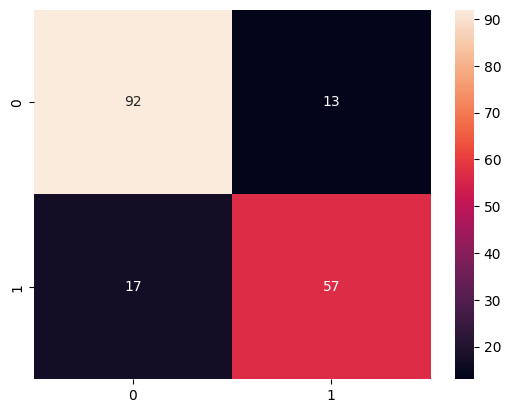

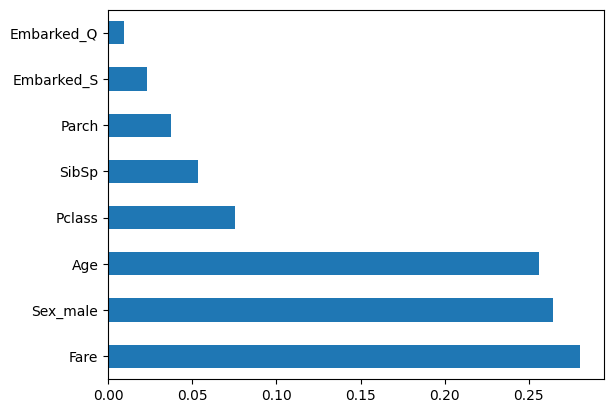

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv("../data/train.csv")

# clean data
# removes unnecessary colums (cabin, name, ticket not useful for survival rediction)
df = df.drop(["PassengerId", "Cabin", "Name", "Ticket"], axis = 1)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna("S", inplace=True)
# converts text into numbers the model understands(0 or 1) & avoids duplicate dummy columns
df = pd.get_dummies(df, drop_first=True)

# all data except the "Survived" column (these are your inputs)
X = df.drop("Survived", axis = 1)
# The "Survived" column (this is what you want to predict)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

model = RandomForestClassifier(n_estimators= 100, 
    max_depth=None,
    min_samples_split=2,
    class_weight='balanced',
    random_state= 42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# check accuracy
acc = accuracy_score(y_test, preds)
print("Accuracy:", acc)

# show confusion matrix
sns.heatmap(confusion_matrix(y_test, preds), annot=True)
plt.show()

# show feature importance
# tells you which features the model thought were most important for predicting survival
# makes a horizontal bar chart of top features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# pick top 10 most important features
# draws a horizontal bar chart showing which features mattered most in predicting survival
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
